# MAE 598: Design Optimization - Homework 4

## Problem 1

## Problem 2

## Problem 3

To maximize the given objective function, we formulate a minimization problem for the negative of the given function.

Objective function

$$ \min_{x_{1}, x_{2}, x_{3}} \quad f(x) = - x_{1} x_{2} - x_{2} x_{3} - x_{1} x_{3} $$

$$ s.t. \quad h(x) = x_{1} + x_{2} + x_{3} - 3 = 0 $$

Formulate the Langrangian

$$ \mathcal{L} = - x_{1} x_{2} - x_{2} x_{3} - x_{1} x_{3} + \lambda_1 (x_{1} + x_{2} + x_{3} - 3) $$


$${
\nabla_x \mathcal{L} 
=
\begin{bmatrix}
- x_2 - x_3 + \lambda_1 \\
- x_1 - x_3 + \lambda_1 \\
- x_2 - x_1 + \lambda_1
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
}$$

$${
\nabla_\lambda \mathcal{L} 
=
x_{1} + x_{2} + x_{3} - 3 = 0
}$$

Solving the four euqations above, we get:

$${ 
x_{1} = x_{2} = x_{3}  = 1 \\
\lambda = 2
}$$


Computing the Hessian of the Lagrangian

$$
\mathcal{L} _{xx}
=
\displaystyle
\begin{bmatrix}
0 & - 1 & - 1 \\
-1 & 0 & -1 \\
-1 & -1 & 0 
\end{bmatrix}
$$


Checking Second Order sufficient conditions


$$
d_x^T \ \mathcal{L} _{xx} \ d_x
=
\begin{bmatrix}
dx_1 & dx_2 & dx_3
\end{bmatrix}
\quad
\begin{bmatrix}
0 & - 1 & - 1 \\
-1 & 0 & -1 \\
-1 & -1 & 0 
\end{bmatrix}
\quad
\begin{bmatrix}
dx_1 \\
dx_2 \\
dx_3
\end{bmatrix}
\quad
=
\quad
- 2 dx_{1} dx_{2} - 2 dx_{2} dx_{3} - 2 dx_{1} dx_{3}
\\
$$



$$
\\
\frac{\partial{h}}{\partial{x}} dx = 0
\\
\begin{bmatrix}
\frac{\partial{h}}{\partial{x_1}} & \frac{\partial{h}}{\partial{x_2}} & \frac{\partial{h}}{\partial{x_3}}
\end{bmatrix}
\quad
\begin{bmatrix}
dx_1 \\
dx_2 \\
dx_3
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
\quad
\begin{bmatrix}
dx_1 \\
dx_2 \\
dx_3
\end{bmatrix}
\quad
=
\quad
0
$$



$$
dx_1 + dx_2 + dx_3 = 0
\\
dx_1 = - dx_2 - dx_3
$$

Substituting this result into the first condition, we get:
$$
d_x^T \ \mathcal{L} _{xx} \ d_x
\quad
=
\quad
- 2 \ (- dx_2 - dx_3) \ dx_{2} - 2 \ dx_{2} \ dx_{3} - 2 \ (- dx_2 - dx_3) \ dx_{3}
\quad
=
\quad
- 2 \ (- dx_2^2 - dx_{2} dx_{3} - dx_{2} dx_{3} - dx_{3}^2 + dx_{2} dx_{3})
\quad
=
\quad
2 \ dx_2^2 + 2 \ dx_{3}^2 + 2 \ dx_{2} dx_{3}
\\
$$


$$
d_x^T \ \mathcal{L} _{xx} \ d_x
\quad
=
\quad
2 \ \Big[(dx_{2} + \frac{dx_{3}}{2})^2 + \frac{3 \ dx_{3}^2}{4}\Big] \ge 0
\\
$$


If $ dx_{2} = 0 $ and $ dx_{3} = 0 $, then from the second condition $ dx_{1} = 0 $ as well. This does not produce a valid perturbation.


$$
\therefore
d_x^T \ \mathcal{L} _{xx} \ d_x
=
2 \ \Big[(dx_{2} + \frac{dx_{3}}{2})^2 + \frac{3 \ dx_{3}^2}{4}\Big] > 0
\\
$$
when $ dx $ is feasible.

The solution $ x = [1, 1, 1] $ is an optimal solution.

## Problem 4

In [1]:
# Import libraries
import torch as t
import numpy as np
from matplotlib import pyplot as plt

import torch.nn as nn
from torch.autograd import Variable
from torch.autograd.functional import jacobian

In [93]:
# Part 1
"""
Decision variable: x0
State variables: x1, x2
"""

m = 2
n = 3

def f(x):
    f = lambda x: x[0] ** 2 + x[1] ** 2 + x[2] ** 2
    # Define the constraints
    h1 = lambda x: ((x[0] ** 2) / 4) + ((x[1] ** 2) / 5) + ((x[2] ** 2) / 25) - 1
    h2 = lambda x: x[0] + x[1] - x[2]
    
    return f(x), h1(x), h2(x)

# Part 2
#Defining input tensor
x = Variable(t.tensor([1., 1., 1.], dtype=t.float64), requires_grad=True)

# Reduced Gradient (Analytically computed)
dfdd_analytical = lambda x: ((-5 * x[0] * x[2]) + (-21 * x[0] * x[2]) + (16 * x[1] * x[2])) / (10 * x[1] + 2 * x[2])

In [3]:
# Compute Jacobian
def jac(x, n=n):
    J = t.zeros((n, n))
    for i in range(n):
       J[i] =  jacobian(f, (x))[i]
    return J

# Evaluate Constraints
def hFunc(x, m=m, n=n):
    H = t.zeros((m, 1))
    for i in range(m):
        # print(n-m+r)
        H[i] =  f(x)[n-m+i]
        # print(f(x)[n-m+r])
    return H


In [4]:
# Part 3
# Reduced gradient
dfdd = lambda J: J[0,0] - J[0,1:] @ t.pinverse(J[1:,1:]) @ J[1:,0]

print('Reduced gradient:', dfdd(jac(x)))
print('Analytical calculation', dfdd_analytical(x))

Reduced gradient: tensor(-0.8333)
Analytical calculation tensor(-0.8333, dtype=torch.float64, grad_fn=<DivBackward0>)


In [5]:
def LMSolve(x, m=m, n=n, epochs=60, Lambda=1.):      
    for i in range(epochs):
        H = hFunc(x)
        J =  jac(x)
        delta = t.pinverse(J[n-m:, n-m:].T @ J[n-m:, n-m:] + Lambda * t.eye(m)) @ J[n-m:, n-m:].T @ H
        with t.no_grad():
            x[n-m:] = x[n-m:] - delta.T
        e = t.norm(H)
    return x

In [8]:
def updateX(x, alpha):
    xn = t.zeros(3)
    J = jac(x)
    xn[0] = x[0] - alpha * dfdd(J)
    xn[1:] = x[1:] + (alpha * t.pinverse(J[1:,1:]) @ J[1:,0].reshape(2,-1) *  dfdd(J)).T[0]
    return xn


def lineSearch(x, t0=0.5, K=25):
    alpha = 1
    i = 0
    
    func = f(updateX(x, alpha))[0]
    phi = f(x)[0] - (t0 * alpha * dfdd(jac(x)) ** 2)
    
    while func > phi and i < K:
        alpha = 0.5 * alpha
        func = f(updateX(x, alpha))[0]
        phi = f(x)[0] - (t0 * alpha * dfdd(jac(x)) ** 2)

        i += 1
    return alpha

In [62]:
# Part 4
# Initialization
def GRG(x):
    e = t.norm(dfdd(jac(x)))
    tol = 1e-3 # Error threshold

    xSol = x.detach().numpy()
    fVal = [f(x)[0].item()]
    alphaSol = [1]
    eVal = [e]

    k = 0
    while e > tol:
        # Part 4.1
        # Inexact line search
        alpha = lineSearch(x)

        # Part 4.2 and 4.3
        J = jac(x) 
        with t.no_grad():
            x[0] = x[0] - alpha * dfdd(J)
            x[1:] = x[1:] + (alpha * t.pinverse(J[1:,1:]) @ J[1:,0].reshape(2,-1) *  dfdd(J)).T[0]

        # Part 4.4
        # LM Solver
        x = LMSolve(x)

        # Part 4.5
        e = t.norm(dfdd(jac(x)))
        
        xSol = np.vstack((xSol, x.detach().numpy())) # Record x values in each iteration
        fVal.append(f(x)[0].item()) # Record f values in each iteration
        alphaSol.append(alpha) # Record alpha values in each iteration
        eVal.append(e)

        k += 1
        print (f"Iteration: {k:<5} Alpha: {alpha:<10} x: {str(x.detach().numpy()) :<40} f(x): {fVal[k]:<20} Error: {e:<20}")
    return xSol, fVal, alphaSol, eVal


Feasible starting point:  tensor([0.1000, 2.0217, 2.1217], dtype=torch.float64, requires_grad=True)
Reduced gradient: tensor(2.5823)
Analytical calculation
 tensor(2.5803, dtype=torch.float64, grad_fn=<DivBackward0>)

GRG

Iteration: 1     Alpha: 0.25       x: [-0.54557415  2.04420139  1.49862724]    f(x): 6.722294098143511    Error: 3.0616188049316406  
Iteration: 2     Alpha: 0.125      x: [-0.9282765   1.92936347  1.00108697]    f(x): 5.5863157917200255   Error: 2.7880258560180664  
Iteration: 3     Alpha: 0.125      x: [-1.27677974  1.71018273  0.43340305]    f(x): 4.742729666089317    Error: 1.9143002033233643  
Iteration: 4     Alpha: 0.0625     x: [-1.3964235   1.59823557  0.20181213]    f(x): 4.545083659483026    Error: 1.3571269512176514  
Iteration: 5     Alpha: 0.0625     x: [-1.48124393  1.50243396  0.02119016]    f(x): 4.451840411348006    Error: 0.8160951137542725  
Iteration: 6     Alpha: 0.0625     x: [-1.53224988  1.4364645  -0.09578523]    f(x): 4.420394752787838    E

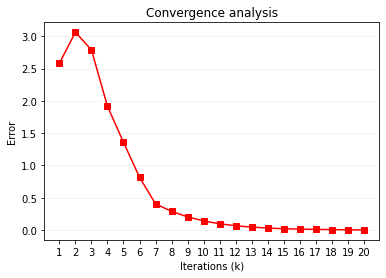

In [75]:


# Find the feasible point based on the initial gues of decision variables
x = t.tensor([0.1, 1., 1.], dtype=t.float64, requires_grad=True)
x = LMSolve(x)
print('Feasible starting point: ', x)
print('Reduced gradient:', dfdd(jac(x)))
print('Analytical calculation\n', dfdd_analytical(x))

 
print("\nGRG\n")
xSol, fVal, alphaSol, eVal = GRG(x)
# Convergence analysis

# Plot results
print("\nConvergence plot\n")
plt.plot(range(1, len(fVal)+1), eVal, "rs-")
# plt.xlim(1, 50)
plt.xticks(ticks=range(1, len(fVal)+1), labels=range(1, len(fVal)+1))
plt.xlabel("Iterations (k)")
plt.ylabel("Error")
plt.title("Convergence analysis")
plt.grid(axis='y', color='0.95')
plt.show()


In [92]:
# # Plot data
# x0, x1, x2 = np.mgrid[-2:2:50j, -2:2:50j, -5:5:50j]
# f([x0, x1, x2])[0]

# fig1 = plt.figure(figsize=(10,10))
# ax1 = fig1.add_subplot(111, projection='3d')

# ax1.scatter([x0, x1, x2], f([x0, x1, x2]), alpha=0.5, cmap="rainbow", label="Actual function")
# # ax1.scatter(xp[:, 0], xp[:, 1], yp, alpha=1, color="black", label="Initial point", linewidth=2)
# ax1.set_xlabel("[x1]")
# ax1.set_ylabel("[x2]")
# ax1.set_zlabel("[f]")
# ax1.set_title("Function plot with initial samples")
# plt.show()

## Problem 5